In [3]:
!pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 51.4/51.4 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [43]:
import yfinance as yf
import numpy as np

df = yf.download('AAPL', start = '2010-01-01')

df['returns'] = np.log(df.Close.pct_change() + 1)

def lagit(df, lags):
    names = []
    for i in range (1,lags +1):
        df["Lag_" + str (i)] = df['returns'].shift(i)
        names.append("Lag_" + str (i))
    return names 

lagnames = lagit(df,5)








df.dropna(inplace = True)

from sklearn.linear_model import LinearRegression

model = LinearRegression ()

model.fit(df[lagnames], df["returns"])

[*********************100%***********************]  1 of 1 completed


LinearRegression()

In [44]:
df['prediction_LR'] = model.predict(df[lagnames])

In [47]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]


In [51]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [55]:
np.exp(df[["returns",'strat_LR']].sum())

returns     18.120587
strat_LR    12.176914
dtype: float64

<AxesSubplot:xlabel='Date'>

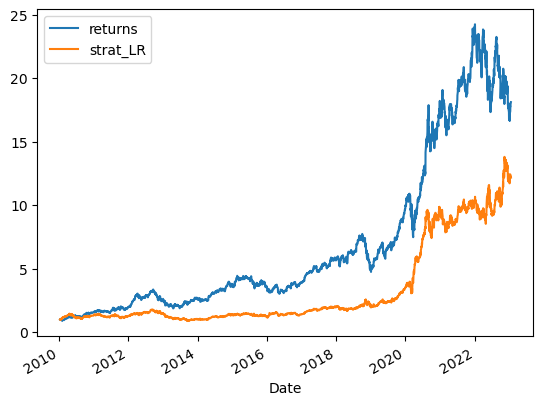

In [57]:
np.exp(df[["returns",'strat_LR']].cumsum()).plot()

In [59]:
from sklearn.model_selection import train_test_split 

In [62]:
train,test = train_test_split(df, shuffle = False,
                             test_size = 0.3, random_state = 0 )

In [63]:
train = train.copy()

In [65]:
model = LinearRegression()

In [66]:
train 


,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,str_LR,strat_LR
Date,,,,,,,,,,,,,,,,
2010-01-12 00:00:00-05:00,7.471071,7.491786,7.372143,7.418571,6.323722,594459600,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.001727,0.001344,1,-0.011440,-0.011440
2010-01-13 00:00:00-05:00,7.423929,7.533214,7.289286,7.523214,6.412922,605892000,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.000994,1,0.014007,0.014007
2010-01-14 00:00:00-05:00,7.503929,7.516429,7.465000,7.479643,6.375781,432894000,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,0.000530,1,-0.005808,-0.005808
2010-01-15 00:00:00-05:00,7.533214,7.557143,7.352500,7.354643,6.269229,594067600,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,0.001596,1,-0.016853,-0.016853
2010-01-19 00:00:00-05:00,7.440357,7.685357,7.401429,7.680000,6.546569,730007600,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.001109,1,0.043288,0.043288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-14 00:00:00-05:00,42.427502,42.814999,42.345001,42.700001,41.389759,87342800,0.003637,-0.004163,0.008580,-0.005768,-0.003105,-0.019121,0.000952,1,0.003637,0.003637
2019-02-15 00:00:00-05:00,42.812500,42.924999,42.437500,42.605000,41.297672,98507200,-0.002227,0.003637,-0.004163,0.008580,-0.005768,-0.003105,0.000433,1,-0.002227,-0.002227
2019-02-19 00:00:00-05:00,42.427502,42.860001,42.372501,42.732498,41.421261,75891200,0.002988,-0.002227,0.003637,-0.004163,0.008580,-0.005768,0.001102,1,0.002988,0.002988


In [67]:
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,str_LR,strat_LR
Date,,,,,,,,,,,,,,,,
2019-02-22 00:00:00-05:00,42.895000,43.250000,42.845001,43.242500,41.915611,75652800,0.011104,-0.005655,0.006415,0.002988,-0.002227,0.003637,0.001161,1,0.011104,0.011104
2019-02-25 00:00:00-05:00,43.540001,43.967499,43.487499,43.557499,42.220943,87493600,0.007258,0.011104,-0.005655,0.006415,0.002988,-0.002227,0.000207,1,0.007258,0.007258
2019-02-26 00:00:00-05:00,43.427502,43.825001,43.292500,43.582500,42.245178,68280800,0.000574,0.007258,0.011104,-0.005655,0.006415,0.002988,0.000839,1,0.000574,0.000574
2019-02-27 00:00:00-05:00,43.302502,43.750000,43.182499,43.717499,42.376034,111341600,0.003093,0.000574,0.007258,0.011104,-0.005655,0.006415,0.000668,1,0.003093,0.003093
2019-02-28 00:00:00-05:00,43.580002,43.727501,43.230000,43.287498,41.959232,112861600,-0.009885,0.003093,0.000574,0.007258,0.011104,-0.005655,0.000543,1,-0.009885,-0.009885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,130.729996,63896200,0.004447,0.004081,0.036133,-0.010661,0.010261,-0.038122,0.000461,1,0.004447,0.004447
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,133.490005,69458900,0.020893,0.004447,0.004081,0.036133,-0.010661,0.010261,-0.000187,-1,-0.020893,-0.020893
2023-01-12 00:00:00-05:00,133.880005,134.259995,131.440002,133.410004,133.410004,71379600,-0.000599,0.020893,0.004447,0.004081,0.036133,-0.010661,-0.000150,-1,0.000599,0.000599


In [68]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [69]:
test['prediction_LR'] = model.predict(test[lagnames])

In [70]:
test['direction_LR'] = [1 if i>0 else -1 for i in test.prediction_LR]

In [71]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [72]:
np.exp(test[['returns', 'strat_LR']].sum())

returns     3.179600
strat_LR    1.966221
dtype: float64

<AxesSubplot:xlabel='Date'>

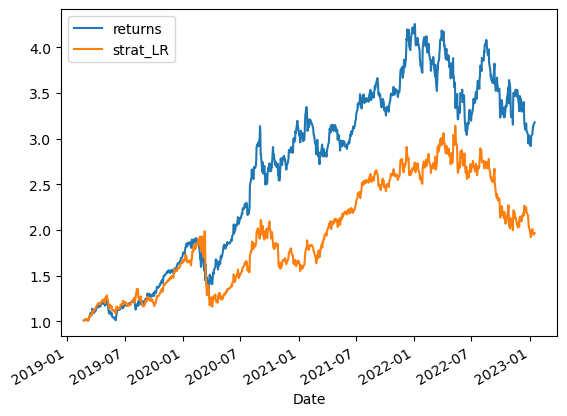

In [75]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()

In [78]:
(test['direction_LR'].diff() !=0).value_counts()

False    586
True     397
Name: direction_LR, dtype: int64